In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from rich.console import Console
console = Console()
from networkx.algorithms.community import girvan_newman

In [2]:
from google.colab import drive
drive.mount("/content/drive/")


Mounted at /content/drive/


In [3]:
import os
os.chdir("/content/drive/My Drive/Colab Notebooks/SOCIAL NETWORK ANALYSIS/")
!ls

 dolphins.gml	  p1_1.csv     p1_2.csv			   problem_sheet_2_sna.ipynb
 karate.gexf	  p1_2_2.csv   p1_3.csv			  'problem sheet 3'
 netscience.gml   p1_2_3.csv   problem_sheet_1_sna.ipynb   skillgraph.gexf


In [4]:
g=nx.read_gml("/content/drive/My Drive/Colab Notebooks/SOCIAL NETWORK ANALYSIS/dolphins.gml")

In [15]:
def cluster_coeff(g):
  clustering_coefficients = {}
  for node in g.nodes():
      neighbors = list(g.neighbors(node))
      n_neighbors = len(neighbors)
      n_links = 0
      if n_neighbors > 1:
          for node1 in neighbors:
              for node2 in neighbors:
                  if g.has_edge(node1, node2):
                      n_links += 1
          n_links /= 2
          clustering_coefficient = n_links / (0.5 * n_neighbors * (n_neighbors - 1))
          clustering_coefficients[node] = clustering_coefficient
      else:
          clustering_coefficients[node] = 0

  console.print(list(clustering_coefficients.items()),style='bold')
  sorted_nodes = sorted(clustering_coefficients.items(), key=lambda x: x[1], reverse=True)

  top_5_nodes = sorted_nodes[:5]
  console.print("Top 5 nodes based on clustering coefficient:",style='bold')
  for node, coeff in top_5_nodes:
      console.print(f"Node {node}: {coeff:.4f}\n",style='bold')

  bottom_5_nodes = sorted_nodes[-5:]
  console.print("\nBottom 5 nodes based on clustering coefficient:",style='bold')
  for node, coeff in bottom_5_nodes:
      console.print(f"Node {node}: {coeff:.4f}\n",style='bold')
  return


In [6]:
def another_type_clus(g):
  # Calculate the clustering coefficient for each node
  clustering_coeffs = nx.clustering(g)
  console.print(clustering_coeffs,style='bold')
  # Sort nodes by their clustering coefficient in descending order
  sorted_nodes1 = sorted(clustering_coeffs.items(), key=lambda x: x[1], reverse=True)
  console.print(sorted_nodes1,style='bold')

  sorted_nodes2 = sorted(clustering_coeffs.items(), key=lambda x: x[1])
  console.print(sorted_nodes2,style='bold')
  # Get the top 5 nodes with the highest clustering coefficients
  top_5_nodes1 = sorted_nodes1[:5]
  console.print(top_5_nodes1,style='bold')
  bottom_5_nodes1 = sorted_nodes1[-5:]
  console.print(bottom_5_nodes1,style='bold')

  top_5_nodes2 = sorted_nodes2[-5:]
  console.print(top_5_nodes2,style='bold')
  bottom_5_nodes2 = sorted_nodes2[:5]
  console.print(bottom_5_nodes2,style='bold')
  print("\n")
  return ""

In [7]:
def triadic_closure_nodes(graph):
    closure_nodes =[]
    for node in graph.nodes():
        neighbors =graph.neighbors(node)
        for i in neighbors:
            for j in neighbors:
                if graph.has_edge(i,j):
                    closure_nodes.append(node)
                    break
    return closure_nodes

def print_duplicates(input_list):
    seen = set()
    duplicates = set()
    for item in input_list:
        if item in seen:
            duplicates.add(item)
        else:
            seen.add(item)
    return list(seen)


In [19]:
def Girvan_Newman_fun(graph):
  a=girvan_newman(graph)
  a=tuple(sorted(c) for c in next(a))
  console.print("applying GIRVAN NEWMAN method:",style='bold')
  console.print(f"the communities are: {a}\n",style='bold')
  densities = [(community, nx.density(graph.subgraph(community))) for community in a]
  console.print(f"the communities with the density is :{densities}\n",style='bold')
  densest_community = max(densities, key=lambda x: x[-1])
  console.print(f"the community which has the density maximum is :{densest_community}\n",style='bold')
  return ""

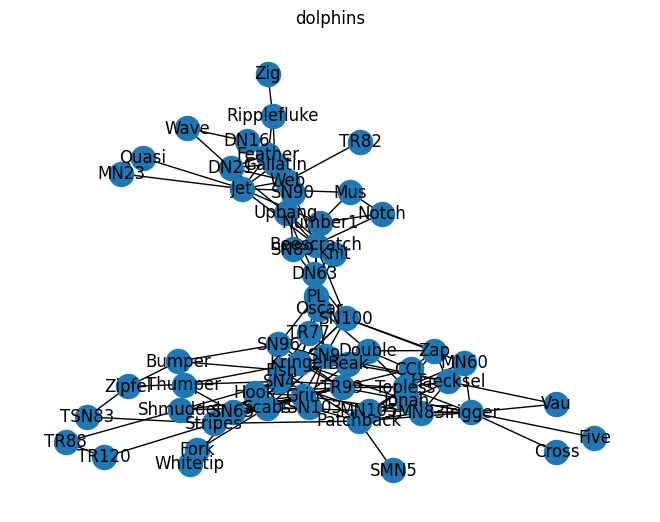

no of nodes:62

no of edges:159

nodes:
['Beak', 'Beescratch', 'Bumper', 'CCL', 'Cross', 'DN16', 'DN21', 'DN63', 'Double', 'Feather', 'Fish', 'Five', 
'Fork', 'Gallatin', 'Grin', 'Haecksel', 'Hook', 'Jet', 'Jonah', 'Knit', 'Kringel', 'MN105', 'MN23', 'MN60', 'MN83',
'Mus', 'Notch', 'Number1', 'Oscar', 'Patchback', 'PL', 'Quasi', 'Ripplefluke', 'Scabs', 'Shmuddel', 'SMN5', 
'SN100', 'SN4', 'SN63', 'SN89', 'SN9', 'SN90', 'SN96', 'Stripes', 'Thumper', 'Topless', 'TR120', 'TR77', 'TR82', 
'TR88', 'TR99', 'Trigger', 'TSN103', 'TSN83', 'Upbang', 'Vau', 'Wave', 'Web', 'Whitetip', 'Zap', 'Zig', 'Zipfel']

edges:
[('Beak', 'Fish'), ('Beak', 'Grin'), ('Beak', 'Haecksel'), ('Beak', 'SN9'), ('Beak', 'SN96'), ('Beak', 'TR77'), 
('Beescratch', 'Jet'), ('Beescratch', 'Knit'), ('Beescratch', 'Notch'), ('Beescratch', 'Number1'), ('Beescratch', 
'Oscar'), ('Beescratch', 'SN100'), ('Beescratch', 'SN90'), ('Beescratch', 'Upbang'), ('Bumper', 'Fish'), ('Bumper',
'SN96'), ('Bumper', 'Thumper'), ('Bumper', 'Zipfel'), ('CCL', 'Double'), ('CCL', 'Grin'), ('CCL', 'Zap'), ('Cross',
'Trigger'), ('DN16', 'Feather'), ('DN16', 'Gallatin'), ('DN16', 'Wave'), ('DN16', 'Web'), ('DN21', 'Feather'), 
('DN21', 'Gallatin'), ('DN21', 'Jet'), ('DN21', 'Upbang'), ('DN21', 'Wave'), ('DN21', 'Web'), ('DN63', 'Knit'), 
('DN63', 'Number1'), ('DN63', 'PL'), ('DN63', 'SN9'), ('DN63', 'Upbang'), ('Double', 'Kringel'), ('Double', 
'Oscar'), ('Double', 'SN4'), ('Double', 'Topless'), ('Double', 'Zap'), ('Feather', 'Gallatin'), ('Feather', 'Jet'),
('Feather', 'Ripplefluke'), ('Feather', 'SN90'), ('Feather', 'Web'), ('Fish', 'Patchback'), ('Fish', 'SN96'), 
('Fish', 'TR77'), ('Five', 'Trigger'), ('Fork', 'Scabs'), ('Gallatin', 'Jet'), ('Gallatin', 'Ripplefluke'), 
('Gallatin', 'SN90'), ('Gallatin', 'Upbang'), ('Gallatin', 'Web'), ('Grin', 'Hook'), ('Grin', 'MN83'), ('Grin', 
'Scabs'), ('Grin', 'Shmuddel'), ('Grin', 'SN4'), ('Grin', 'SN63'), ('Grin', 'SN9'), ('Grin', 'Stripes'), ('Grin', 
'TR99'), ('Grin', 'TSN103'), ('Haecksel', 'Jonah'), ('Haecksel', 'MN83'), ('Haecksel', 'SN9'), ('Haecksel', 
'Topless'), ('Haecksel', 'Vau'), ('Haecksel', 'Zap'), ('Hook', 'Kringel'), ('Hook', 'Scabs'), ('Hook', 'SN4'), 
('Hook', 'SN63'), ('Hook', 'TR99'), ('Jet', 'MN23'), ('Jet', 'Mus'), ('Jet', 'Number1'), ('Jet', 'Quasi'), ('Jet', 
'Web'), ('Jonah', 'Kringel'), ('Jonah', 'MN105'), ('Jonah', 'MN83'), ('Jonah', 'Patchback'), ('Jonah', 'Topless'), 
('Jonah', 'Trigger'), ('Knit', 'PL'), ('Knit', 'Upbang'), ('Kringel', 'Oscar'), ('Kringel', 'SN100'), ('Kringel', 
'SN63'), ('Kringel', 'Thumper'), ('Kringel', 'TR77'), ('Kringel', 'TR99'), ('MN105', 'Patchback'), ('MN105', 
'Scabs'), ('MN105', 'SN4'), ('MN105', 'Topless'), ('MN105', 'Trigger'), ('MN60', 'SN100'), ('MN60', 'Topless'), 
('MN60', 'Trigger'), ('MN83', 'Patchback'), ('MN83', 'Topless'), ('MN83', 'Trigger'), ('Mus', 'Notch'), ('Mus', 
'Number1'), ('Notch', 'Number1'), ('Oscar', 'PL'), ('Oscar', 'TR77'), ('Patchback', 'SMN5'), ('Patchback', 
'Stripes'), ('Patchback', 'Topless'), ('Patchback', 'Trigger'), ('Patchback', 'TSN103'), ('PL', 'SN96'), ('PL', 
'TR77'), ('Ripplefluke', 'Zig'), ('Scabs', 'Shmuddel'), ('Scabs', 'SN4'), ('Scabs', 'SN63'), ('Scabs', 'SN9'), 
('Scabs', 'Stripes'), ('Scabs', 'TR99'), ('Shmuddel', 'SN4'), ('Shmuddel', 'Thumper'), ('Shmuddel', 'TR88'), 
('SN100', 'SN4'), ('SN100', 'SN89'), ('SN100', 'SN9'), ('SN100', 'Zap'), ('SN4', 'SN9'), ('SN4', 'Stripes'), 
('SN4', 'Topless'), ('SN4', 'Zipfel'), ('SN63', 'Stripes'), ('SN63', 'Thumper'), ('SN63', 'TSN103'), ('SN63', 
'Whitetip'), ('SN89', 'Web'), ('SN9', 'TSN103'), ('SN90', 'Upbang'), ('SN90', 'Web'), ('SN96', 'TR77'), ('SN96', 
'TR99'), ('Stripes', 'TR120'), ('Stripes', 'TSN83'), ('Topless', 'TR99'), ('Topless', 'Trigger'), ('Topless', 
'Zap'), ('TR120', 'TR88'), ('TR82', 'Web'), ('TR99', 'Trigger'), ('Trigger', 'Vau'), ('TSN83', 'Zipfel'), 
('Upbang', 'Web')]

degree of each node:
{'Beak': 6, 'Beescratch': 8, 'Bumper': 4, 'CCL': 3, 'Cross': 1, 'DN16': 4, 'DN21': 6, 'DN63': 5, 'Double': 6, 
'Feather': 7, 'Fish': 5, 'Five': 1, 'Fork': 1, 'Gallatin': 8, 'Grin': 12, 'Haecksel': 7, 'Hook': 6, 'Jet': 9, 
'Jonah': 7, 'Knit': 4, 'Kringel': 9, 'MN105': 6, 'MN23': 1, 'MN60': 3, 'MN83': 6, 'Mus': 3, 'Notch': 3, 'Number1': 
5, 'Oscar': 5, 'Patchback': 9, 'PL': 5, 'Quasi': 1, 'Ripplefluke': 3, 'Scabs': 10, 'Shmuddel': 5, 'SMN5': 1, 
'SN100': 7, 'SN4': 11, 'SN63': 8, 'SN89': 2, 'SN9': 8, 'SN90': 5, 'SN96': 6, 'Stripes': 7, 'Thumper': 4, 'Topless':
11, 'TR120': 2, 'TR77': 6, 'TR82': 1, 'TR88': 2, 'TR99': 7, 'Trigger': 10, 'TSN103': 4, 'TSN83': 2, 'Upbang': 7, 
'Vau': 2, 'Wave': 2, 'Web': 9, 'Whitetip': 1, 'Zap': 5, 'Zig': 1, 'Zipfel': 3}

the no of triangles can be formed :95.0

Nodes satisfying the triadic closure property: ['Web', 'Jonah', 'Beak', 'Grin', 'Knit', 'Kringel', 'Beescratch', 
'SN90', 'DN16', 'CCL', 'MN105', 'Hook', 'PL', 'Ripplefluke', 'Gallatin', 'TR77', 'DN63', 'Notch', 'Feather', 
'Haecksel', 'DN21', 'SN4', 'SN9', 'SN63', 'Zap', 'Mus', 'SN96', 'Upbang', 'Topless', 'Double', 'Stripes', 'TR99', 
'Number1', 'TSN103', 'Fish', 'Jet', 'Shmuddel', 'Bumper']

the cluster coefficient of the top/bottom five node in the graph:

[
    ('Beak', 0.3333333333333333),
    ('Beescratch', 0.14285714285714285),
    ('Bumper', 0.16666666666666666),
    ('CCL', 0.3333333333333333),
    ('Cross', 0),
    ('DN16', 0.5),
    ('DN21', 0.5333333333333333),
    ('DN63', 0.2),
    ('Double', 0.26666666666666666),
    ('Feather', 0.5238095238095238),
    ('Fish', 0.4),
    ('Five', 0),
    ('Fork', 0),
    ('Gallatin', 0.5),
    ('Grin', 0.25757575757575757),
    ('Haecksel', 0.23809523809523808),
    ('Hook', 0.6),
    ('Jet', 0.2222222222222222),
    ('Jonah', 0.5238095238095238),
    ('Knit', 0.5),
    ('Kringel', 0.1388888888888889),
    ('MN105', 0.5333333333333333),
    ('MN23', 0),
    ('MN60', 0.3333333333333333),
    ('MN83', 0.5333333333333333),
    ('Mus', 0.6666666666666666),
    ('Notch', 0.6666666666666666),
    ('Number1', 0.4),
    ('Oscar', 0.3),
    ('Patchback', 0.25),
    ('PL', 0.3),
    ('Quasi', 0),
    ('Ripplefluke', 0.3333333333333333),
    ('Scabs', 0.3333333333333333),
    ('Shmuddel', 0.3),
    ('SMN5', 0),
    ('SN100', 0.047619047619047616),
    ('SN4', 0.23636363636363636),
    ('SN63', 0.2857142857142857),
    ('SN89', 0.0),
    ('SN9', 0.25),
    ('SN90', 0.6),
    ('SN96', 0.3333333333333333),
    ('Stripes', 0.23809523809523808),
    ('Thumper', 0.16666666666666666),
    ('Topless', 0.3090909090909091),
    ('TR120', 0.0),
    ('TR77', 0.4),
    ('TR82', 0),
    ('TR88', 0.0),
    ('TR99', 0.23809523809523808),
    ('Trigger', 0.24444444444444444),
    ('TSN103', 0.3333333333333333),
    ('TSN83', 0.0),
    ('Upbang', 0.38095238095238093),
    ('Vau', 0.0),
    ('Wave', 0.0),
    ('Web', 0.3611111111111111),
    ('Whitetip', 0),
    ('Zap', 0.3),
    ('Zig', 0),
    ('Zipfel', 0.0)
]

Top 5 nodes based on clustering coefficient:

Node Mus: 0.6667

Node Notch: 0.6667

Node Hook: 0.6000

Node SN90: 0.6000

Node DN21: 0.5333

Bottom 5 nodes based on clustering coefficient:

Node Vau: 0.0000

Node Wave: 0.0000

Node Whitetip: 0.0000

Node Zig: 0.0000

Node Zipfel: 0.0000

the cluster coefficient of the top/bottom five node in the graph to check alphabetical order:

{
    'Beak': 0.3333333333333333,
    'Beescratch': 0.14285714285714285,
    'Bumper': 0.16666666666666666,
    'CCL': 0.3333333333333333,
    'Cross': 0,
    'DN16': 0.5,
    'DN21': 0.5333333333333333,
    'DN63': 0.2,
    'Double': 0.26666666666666666,
    'Feather': 0.5238095238095238,
    'Fish': 0.4,
    'Five': 0,
    'Fork': 0,
    'Gallatin': 0.5,
    'Grin': 0.25757575757575757,
    'Haecksel': 0.23809523809523808,
    'Hook': 0.6,
    'Jet': 0.2222222222222222,
    'Jonah': 0.5238095238095238,
    'Knit': 0.5,
    'Kringel': 0.1388888888888889,
    'MN105': 0.5333333333333333,
    'MN23': 0,
    'MN60': 0.3333333333333333,
    'MN83': 0.5333333333333333,
    'Mus': 0.6666666666666666,
    'Notch': 0.6666666666666666,
    'Number1': 0.4,
    'Oscar': 0.3,
    'Patchback': 0.25,
    'PL': 0.3,
    'Quasi': 0,
    'Ripplefluke': 0.3333333333333333,
    'Scabs': 0.3333333333333333,
    'Shmuddel': 0.3,
    'SMN5': 0,
    'SN100': 0.047619047619047616,
    'SN4': 0.23636363636363636,
    'SN63': 0.2857142857142857,
    'SN89': 0,
    'SN9': 0.25,
    'SN90': 0.6,
    'SN96': 0.3333333333333333,
    'Stripes': 0.23809523809523808,
    'Thumper': 0.16666666666666666,
    'Topless': 0.3090909090909091,
    'TR120': 0,
    'TR77': 0.4,
    'TR82': 0,
    'TR88': 0,
    'TR99': 0.23809523809523808,
    'Trigger': 0.24444444444444444,
    'TSN103': 0.3333333333333333,
    'TSN83': 0,
    'Upbang': 0.38095238095238093,
    'Vau': 0,
    'Wave': 0,
    'Web': 0.3611111111111111,
    'Whitetip': 0,
    'Zap': 0.3,
    'Zig': 0,
    'Zipfel': 0
}

[
    ('Mus', 0.6666666666666666),
    ('Notch', 0.6666666666666666),
    ('Hook', 0.6),
    ('SN90', 0.6),
    ('DN21', 0.5333333333333333),
    ('MN105', 0.5333333333333333),
    ('MN83', 0.5333333333333333),
    ('Feather', 0.5238095238095238),
    ('Jonah', 0.5238095238095238),
    ('DN16', 0.5),
    ('Gallatin', 0.5),
    ('Knit', 0.5),
    ('Fish', 0.4),
    ('Number1', 0.4),
    ('TR77', 0.4),
    ('Upbang', 0.38095238095238093),
    ('Web', 0.3611111111111111),
    ('Beak', 0.3333333333333333),
    ('CCL', 0.3333333333333333),
    ('MN60', 0.3333333333333333),
    ('Ripplefluke', 0.3333333333333333),
    ('Scabs', 0.3333333333333333),
    ('SN96', 0.3333333333333333),
    ('TSN103', 0.3333333333333333),
    ('Topless', 0.3090909090909091),
    ('Oscar', 0.3),
    ('PL', 0.3),
    ('Shmuddel', 0.3),
    ('Zap', 0.3),
    ('SN63', 0.2857142857142857),
    ('Double', 0.26666666666666666),
    ('Grin', 0.25757575757575757),
    ('Patchback', 0.25),
    ('SN9', 0.25),
    ('Trigger', 0.24444444444444444),
    ('Haecksel', 0.23809523809523808),
    ('Stripes', 0.23809523809523808),
    ('TR99', 0.23809523809523808),
    ('SN4', 0.23636363636363636),
    ('Jet', 0.2222222222222222),
    ('DN63', 0.2),
    ('Bumper', 0.16666666666666666),
    ('Thumper', 0.16666666666666666),
    ('Beescratch', 0.14285714285714285),
    ('Kringel', 0.1388888888888889),
    ('SN100', 0.047619047619047616),
    ('Cross', 0),
    ('Five', 0),
    ('Fork', 0),
    ('MN23', 0),
    ('Quasi', 0),
    ('SMN5', 0),
    ('SN89', 0),
    ('TR120', 0),
    ('TR82', 0),
    ('TR88', 0),
    ('TSN83', 0),
    ('Vau', 0),
    ('Wave', 0),
    ('Whitetip', 0),
    ('Zig', 0),
    ('Zipfel', 0)
]

[
    ('Cross', 0),
    ('Five', 0),
    ('Fork', 0),
    ('MN23', 0),
    ('Quasi', 0),
    ('SMN5', 0),
    ('SN89', 0),
    ('TR120', 0),
    ('TR82', 0),
    ('TR88', 0),
    ('TSN83', 0),
    ('Vau', 0),
    ('Wave', 0),
    ('Whitetip', 0),
    ('Zig', 0),
    ('Zipfel', 0),
    ('SN100', 0.047619047619047616),
    ('Kringel', 0.1388888888888889),
    ('Beescratch', 0.14285714285714285),
    ('Bumper', 0.16666666666666666),
    ('Thumper', 0.16666666666666666),
    ('DN63', 0.2),
    ('Jet', 0.2222222222222222),
    ('SN4', 0.23636363636363636),
    ('Haecksel', 0.23809523809523808),
    ('Stripes', 0.23809523809523808),
    ('TR99', 0.23809523809523808),
    ('Trigger', 0.24444444444444444),
    ('Patchback', 0.25),
    ('SN9', 0.25),
    ('Grin', 0.25757575757575757),
    ('Double', 0.26666666666666666),
    ('SN63', 0.2857142857142857),
    ('Oscar', 0.3),
    ('PL', 0.3),
    ('Shmuddel', 0.3),
    ('Zap', 0.3),
    ('Topless', 0.3090909090909091),
    ('Beak', 0.3333333333333333),
    ('CCL', 0.3333333333333333),
    ('MN60', 0.3333333333333333),
    ('Ripplefluke', 0.3333333333333333),
    ('Scabs', 0.3333333333333333),
    ('SN96', 0.3333333333333333),
    ('TSN103', 0.3333333333333333),
    ('Web', 0.3611111111111111),
    ('Upbang', 0.38095238095238093),
    ('Fish', 0.4),
    ('Number1', 0.4),
    ('TR77', 0.4),
    ('DN16', 0.5),
    ('Gallatin', 0.5),
    ('Knit', 0.5),
    ('Feather', 0.5238095238095238),
    ('Jonah', 0.5238095238095238),
    ('DN21', 0.5333333333333333),
    ('MN105', 0.5333333333333333),
    ('MN83', 0.5333333333333333),
    ('Hook', 0.6),
    ('SN90', 0.6),
    ('Mus', 0.6666666666666666),
    ('Notch', 0.6666666666666666)
]

[
    ('Mus', 0.6666666666666666),
    ('Notch', 0.6666666666666666),
    ('Hook', 0.6),
    ('SN90', 0.6),
    ('DN21', 0.5333333333333333)
]

[('Vau', 0), ('Wave', 0), ('Whitetip', 0), ('Zig', 0), ('Zipfel', 0)]

[
    ('MN83', 0.5333333333333333),
    ('Hook', 0.6),
    ('SN90', 0.6),
    ('Mus', 0.6666666666666666),
    ('Notch', 0.6666666666666666)
]

[('Cross', 0), ('Five', 0), ('Fork', 0), ('MN23', 0), ('Quasi', 0)]

the clustering coefficient of the graph is:0.2589582460550202

the bridge in the network are :[('Cross', 'Trigger'), ('Five', 'Trigger'), ('Fork', 'Scabs'), ('Jet', 'MN23'), 
('Jet', 'Quasi'), ('Patchback', 'SMN5'), ('Ripplefluke', 'Zig'), ('SN63', 'Whitetip'), ('TR82', 'Web')] , removal 
of these bridges will increase the connected Component in the graph

the edge with the maximum edge centrality is (('Beescratch', 'SN100'), 0.1496300225023195) 

applying GIRVAN NEWMAN method:

the communities are: (['Beak', 'Bumper', 'CCL', 'Cross', 'Double', 'Fish', 'Five', 'Fork', 'Grin', 'Haecksel', 
'Hook', 'Jonah', 'Kringel', 'MN105', 'MN60', 'MN83', 'Oscar', 'PL', 'Patchback', 'SMN5', 'SN100', 'SN4', 'SN63', 
'SN9', 'SN96', 'Scabs', 'Shmuddel', 'Stripes', 'TR120', 'TR77', 'TR88', 'TR99', 'TSN103', 'TSN83', 'Thumper', 
'Topless', 'Trigger', 'Vau', 'Whitetip', 'Zap', 'Zipfel'], ['Beescratch', 'DN16', 'DN21', 'DN63', 'Feather', 
'Gallatin', 'Jet', 'Knit', 'MN23', 'Mus', 'Notch', 'Number1', 'Quasi', 'Ripplefluke', 'SN89', 'SN90', 'TR82', 
'Upbang', 'Wave', 'Web', 'Zig'])

the communities with the density is :[(['Beak', 'Bumper', 'CCL', 'Cross', 'Double', 'Fish', 'Five', 'Fork', 'Grin',
'Haecksel', 'Hook', 'Jonah', 'Kringel', 'MN105', 'MN60', 'MN83', 'Oscar', 'PL', 'Patchback', 'SMN5', 'SN100', 
'SN4', 'SN63', 'SN9', 'SN96', 'Scabs', 'Shmuddel', 'Stripes', 'TR120', 'TR77', 'TR88', 'TR99', 'TSN103', 'TSN83', 
'Thumper', 'Topless', 'Trigger', 'Vau', 'Whitetip', 'Zap', 'Zipfel'], 0.1329268292682927), (['Beescratch', 'DN16', 
'DN21', 'DN63', 'Feather', 'Gallatin', 'Jet', 'Knit', 'MN23', 'Mus', 'Notch', 'Number1', 'Quasi', 'Ripplefluke', 
'SN89', 'SN90', 'TR82', 'Upbang', 'Wave', 'Web', 'Zig'], 0.20952380952380953)]

the community which has the density maximum is :(['Beescratch', 'DN16', 'DN21', 'DN63', 'Feather', 'Gallatin', 
'Jet', 'Knit', 'MN23', 'Mus', 'Notch', 'Number1', 'Quasi', 'Ripplefluke', 'SN89', 'SN90', 'TR82', 'Upbang', 'Wave',
'Web', 'Zig'], 0.20952380952380953)

''

In [20]:
#graph
nx.draw(g,with_labels=True)
plt.title("dolphins")
plt.show()
#no of nodes
nodes=g.number_of_nodes()
console.print(f"no of nodes:{nodes}\n",style="bold")
#no of edges
edges=g.number_of_edges()
console.print(f"no of edges:{edges}\n",style="bold")
#list of nodes
nodes=g.nodes()
console.print(f"nodes:\n{nodes}\n",style="bold")
#list of edges:
edges=g.edges()
console.print(f"edges:\n{edges}\n",style="bold")
#degree of nodes
console.print(f"degree of each node:\n{dict(g.degree())}\n",style="bold")
#no of triangles
tri=sum(nx.triangles(g).values())/3
console.print(f"the no of triangles can be formed :{tri}\n",style="bold")
# node that statisfy closure property
closure_nodes = triadic_closure_nodes(g)
closure_nodes=print_duplicates(closure_nodes)
console.print(f"Nodes satisfying the triadic closure property: {closure_nodes}\n",style="bold")
#find the clustering coeffient of top and bottom five nodes
console.print(f"the cluster coefficient of the top/bottom five node in the graph:\n",style='bold')
cluster_coeff(g)
console.print(f"the cluster coefficient of the top/bottom five node in the graph to check alphabetical order:\n",style='bold')
another_type_clus(g)
#clusterring coefffient of entire graph
console.print(f"the clustering coefficient of the graph is:{nx.average_clustering(g)}\n",style='bold')
#find the bridges in the graph
console.print(f"the bridge in the network are :{list(nx.bridges(g))} , removal of these bridges will increase the connected Component in the graph\n",style='bold')
#edge betweenness of all edges
edge_centrality=nx.edge_betweenness_centrality(g)
max_edge_centrality=max(edge_centrality,key=edge_centrality.get)
console.print(f"the edge with the maximum edge centrality is {max_edge_centrality,edge_centrality[max_edge_centrality]} \n",style="bold")
#apllication od girwan newman to find the communities and the densit of the communities
Girvan_Newman_fun(g)